In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pyabf

In [2]:
%matplotlib inline
%run "./functions collections.py"

In [3]:
fp = 'D:/Lab data at Harvard/Clampex Data/20180722 Mouse-0/'
fl = os.listdir(fp)
data_names = [fp + x for x in fl]
data_names

['D:/Lab data at Harvard/Clampex Data/20180722 Mouse-0/s1000.abf',
 'D:/Lab data at Harvard/Clampex Data/20180722 Mouse-0/s2000.abf']

# Mouse-0 Day-0

In [4]:
s1 = pyabf.ABF(data_names[0])
s2 = pyabf.ABF(data_names[1])

In [5]:
s1.setSweep(0)
s2.setSweep(0)
cutoff = 250;
fs = 20000;
data1 = np.reshape(s1.signalData, (int(s1.signalData.shape[0]/8), 8));
data2 = np.reshape(s2.signalData, (int(s2.signalData.shape[0]/8), 8));
data1_hf = Butter_highpass_filter(data1[10800000:12000000, :], cutoff, fs, order=2);
data2_hf = Butter_highpass_filter(data2[10800000:12000000, :], cutoff, fs, order=2);
data1_lf = Butter_lowpass_filter(data1_hf, 5000, fs, order=2);
data2_lf = Butter_lowpass_filter(data2_hf, 5000, fs, order=2);

data1_norh = Normalize(data1_hf);
data2_norh = Normalize(data2_hf);
data1_norl = Normalize(data1_lf);
data2_norl = Normalize(data2_lf);

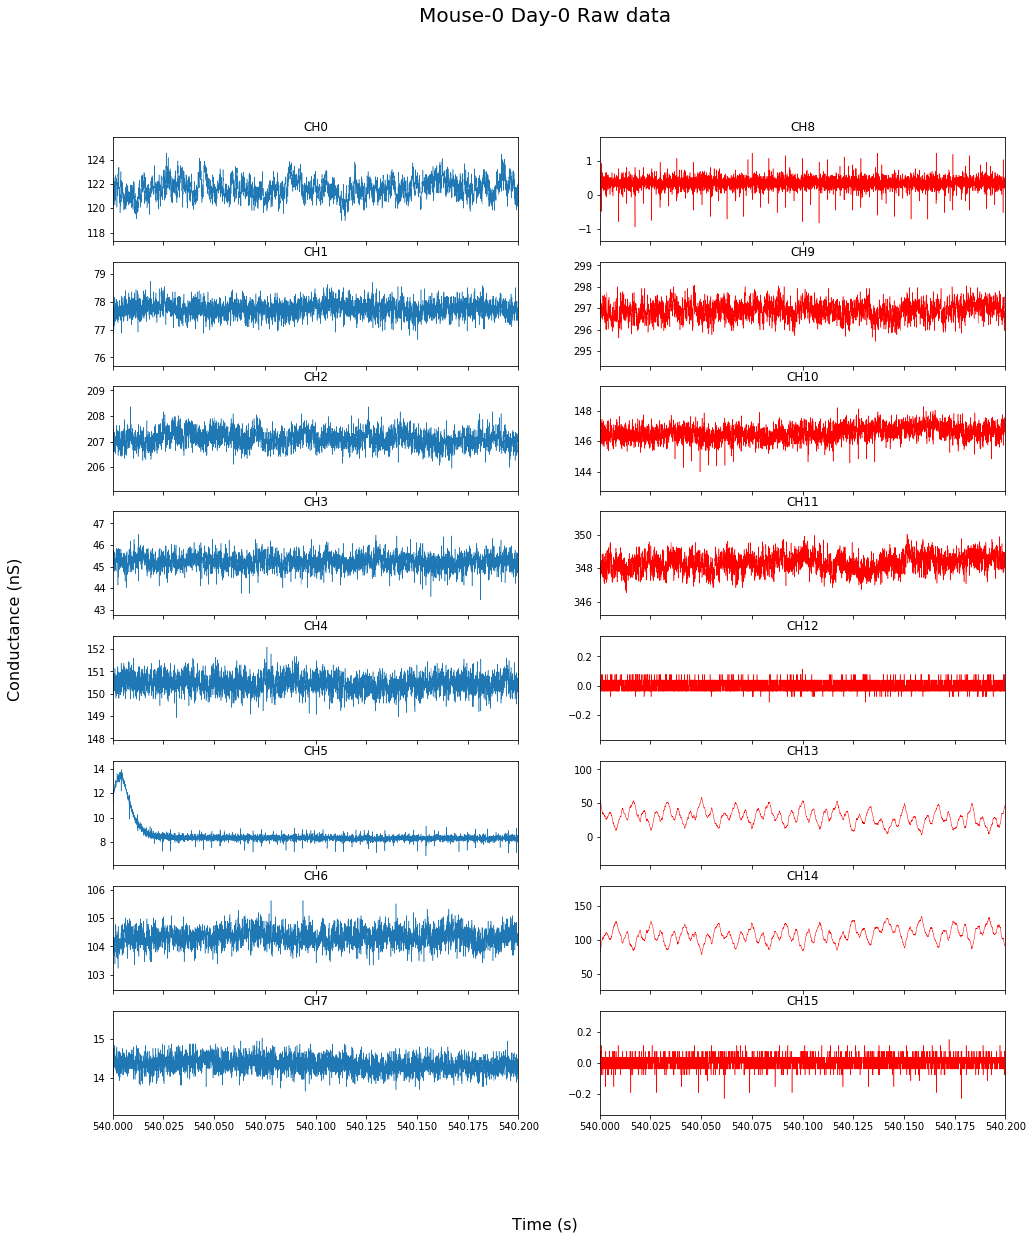

In [6]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-0 Raw data", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    ax[i, 0].plot(s1.dataX[10800000:12000000], data1[10800000:12000000, i]*10, lw=0.5);
    ax[i, 0].set_xlim(540.00, 540.2);
    ax[i, 0].set_title('CH'+str(i));
    
    ax[i, 1].plot(s2.dataX[10800000:12000000], data2[10800000:12000000, i]*10, color='r', lw=0.5);
    ax[i, 1].set_xlim(540.00, 540.2);
    ax[i, 1].set_title('CH'+str(8+i));

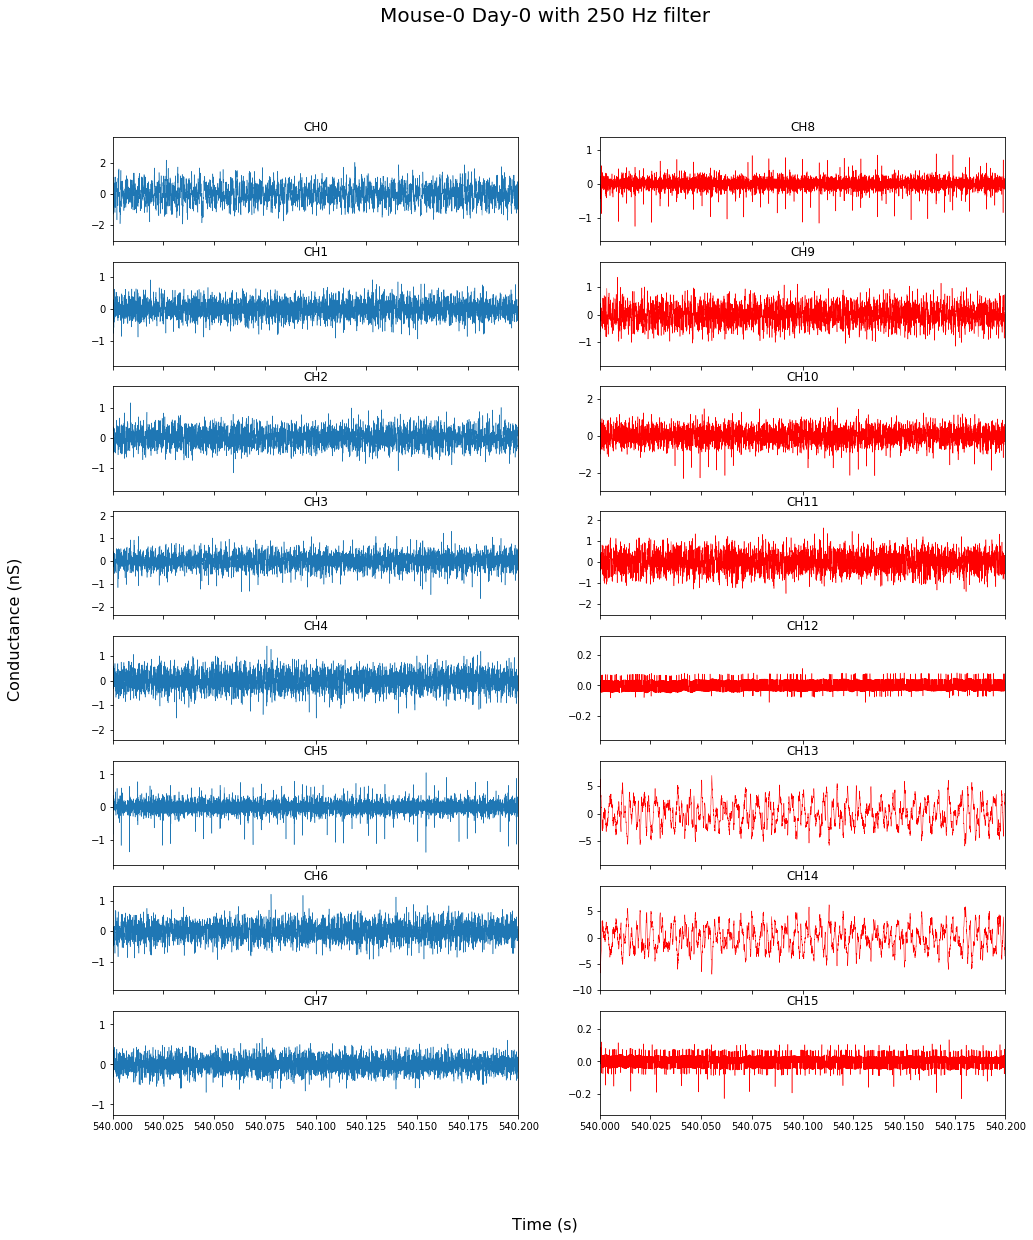

In [7]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-0 with 250 Hz filter", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    ax[i, 0].plot(s1.dataX[10800000:12000000], data1_hf[:, i]*10, lw=0.5);
    ax[i, 0].set_xlim(540.00, 540.2);
    ax[i, 0].set_title('CH'+str(i));
    
    ax[i, 1].plot(s2.dataX[10800000:12000000], data2_hf[:, i]*10, color='r', lw=0.5);
    ax[i, 1].set_xlim(540.00, 540.2);
    ax[i, 1].set_title('CH'+str(8+i));


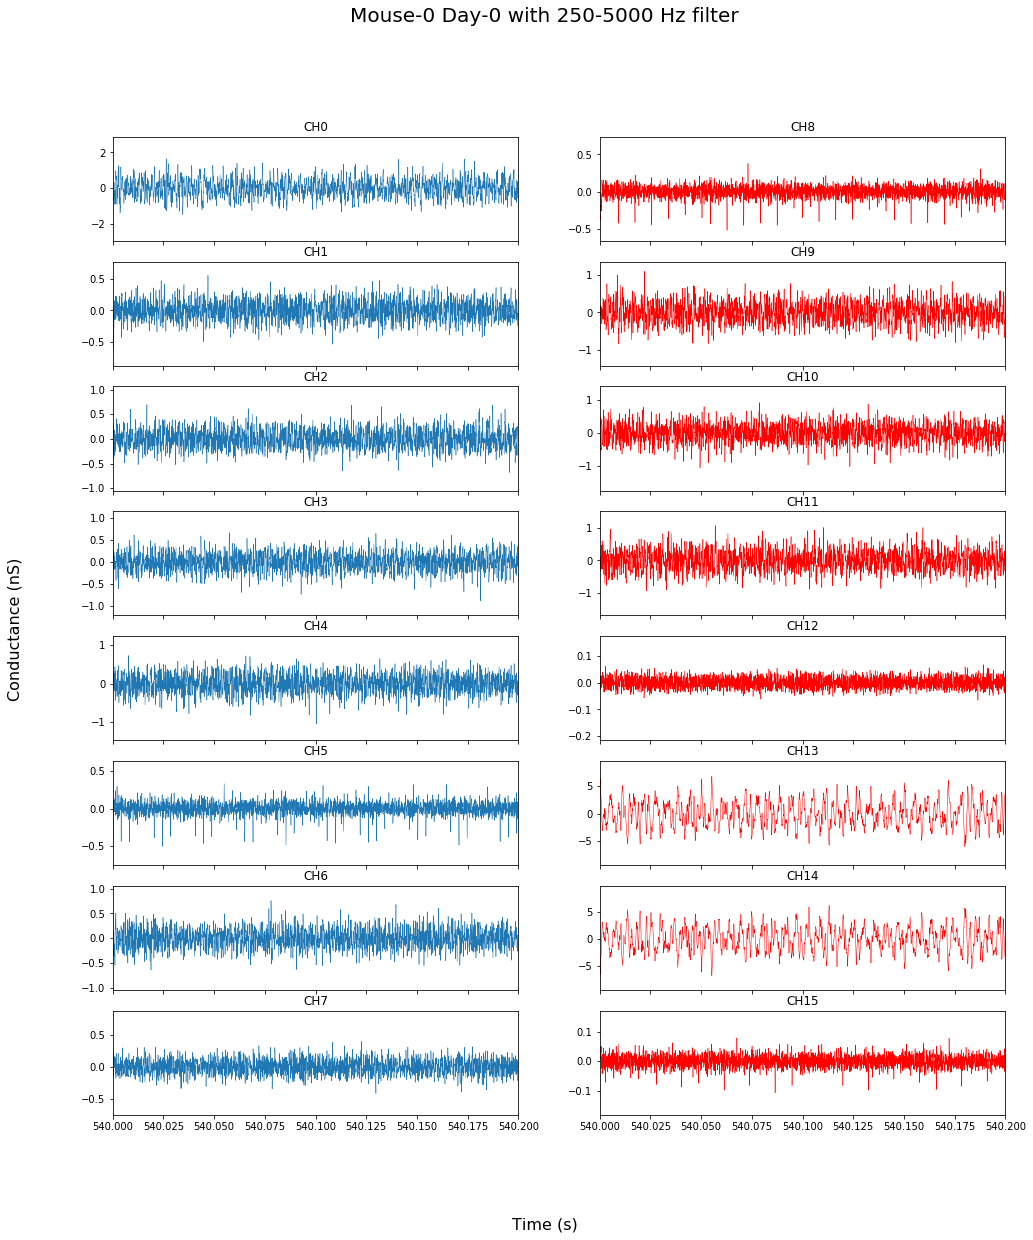

In [8]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-0 with 250-5000 Hz filter", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    ax[i, 0].plot(s1.dataX[10800000:12000000], data1_lf[:, i]*10, lw=0.5);
    ax[i, 0].set_xlim(540.00, 540.2);
    ax[i, 0].set_title('CH'+str(i));
    
    ax[i, 1].plot(s2.dataX[10800000:12000000], data2_lf[:, i]*10, color='r', lw=0.5);
    ax[i, 1].set_xlim(540.00, 540.2);
    ax[i, 1].set_title('CH'+str(8+i));


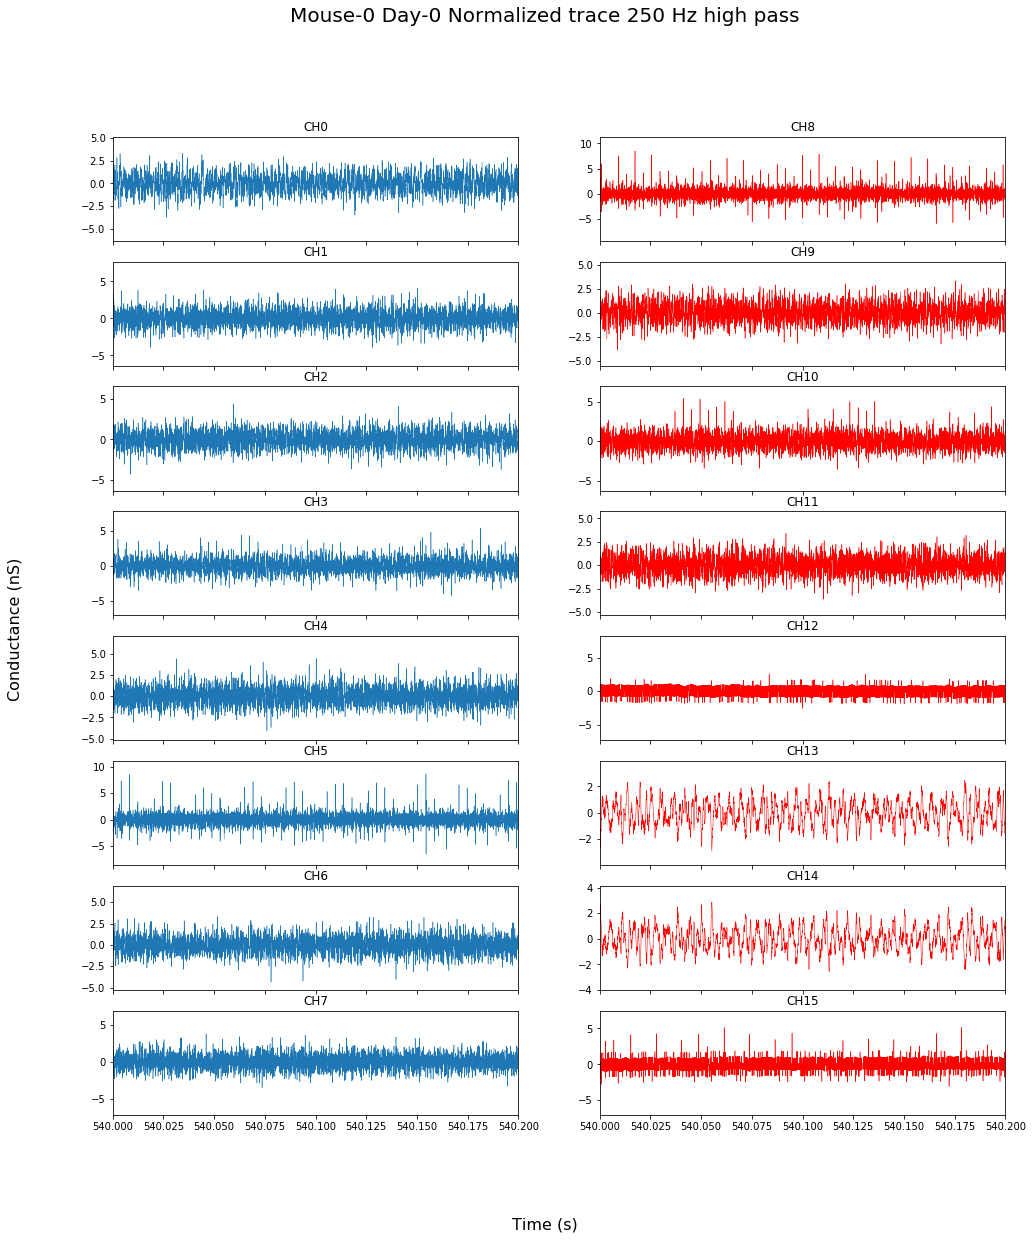

In [9]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-0 Normalized trace 250 Hz high pass", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);


for i in range(8):
    ax[i, 0].plot(s1.dataX[10800000:12000000], data1_norh[:, i]*-1, lw=0.5);
    ax[i, 0].set_xlim(540.00, 540.2);
    ax[i, 0].set_title('CH'+str(i));
    
    ax[i, 1].plot(s2.dataX[10800000:12000000], data2_norh[:, i]*-1, color='r', lw=0.5);
    ax[i, 1].set_xlim(540.00, 540.2);
    ax[i, 1].set_title('CH'+str(8+i));


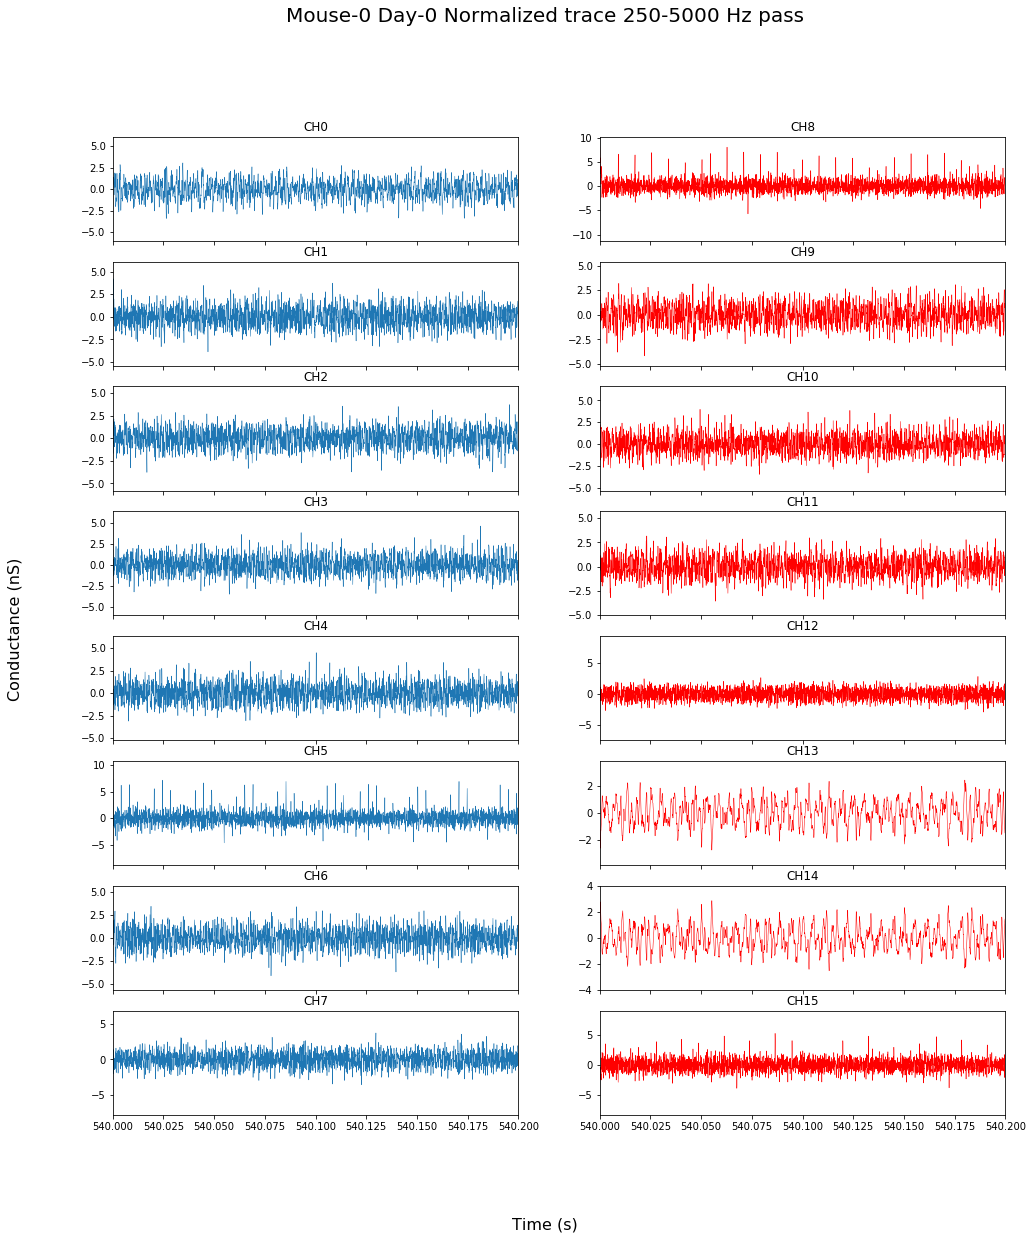

In [10]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-0 Normalized trace 250-5000 Hz pass", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    ax[i, 0].plot(s1.dataX[10800000:12000000], data1_norl[:, i]*-1, lw=0.5);
    ax[i, 0].set_xlim(540.00, 540.2);
    ax[i, 0].set_title('CH'+str(i));
    
    ax[i, 1].plot(s2.dataX[10800000:12000000], data2_norl[:, i]*-1, color='r', lw=0.5);
    ax[i, 1].set_xlim(540.00, 540.2);
    ax[i, 1].set_title('CH'+str(8+i));


# Spike detection and cut

In [11]:
data1_rec = np.copy(data1_norl);
data2_rec = np.copy(data2_norl);

data1_rec[np.absolute(data1_rec) < 4] = 0;
data2_rec[np.absolute(data2_rec) < 4] = 0;

peak1_pos = Peaks(np.absolute(data1_rec));
peak2_pos = Peaks(np.absolute(data2_rec));

spike1 = Spike_event(data1_lf, peak1_pos)
spike2 = Spike_event(data2_lf, peak2_pos)
time = np.linspace(0., 3., 61);

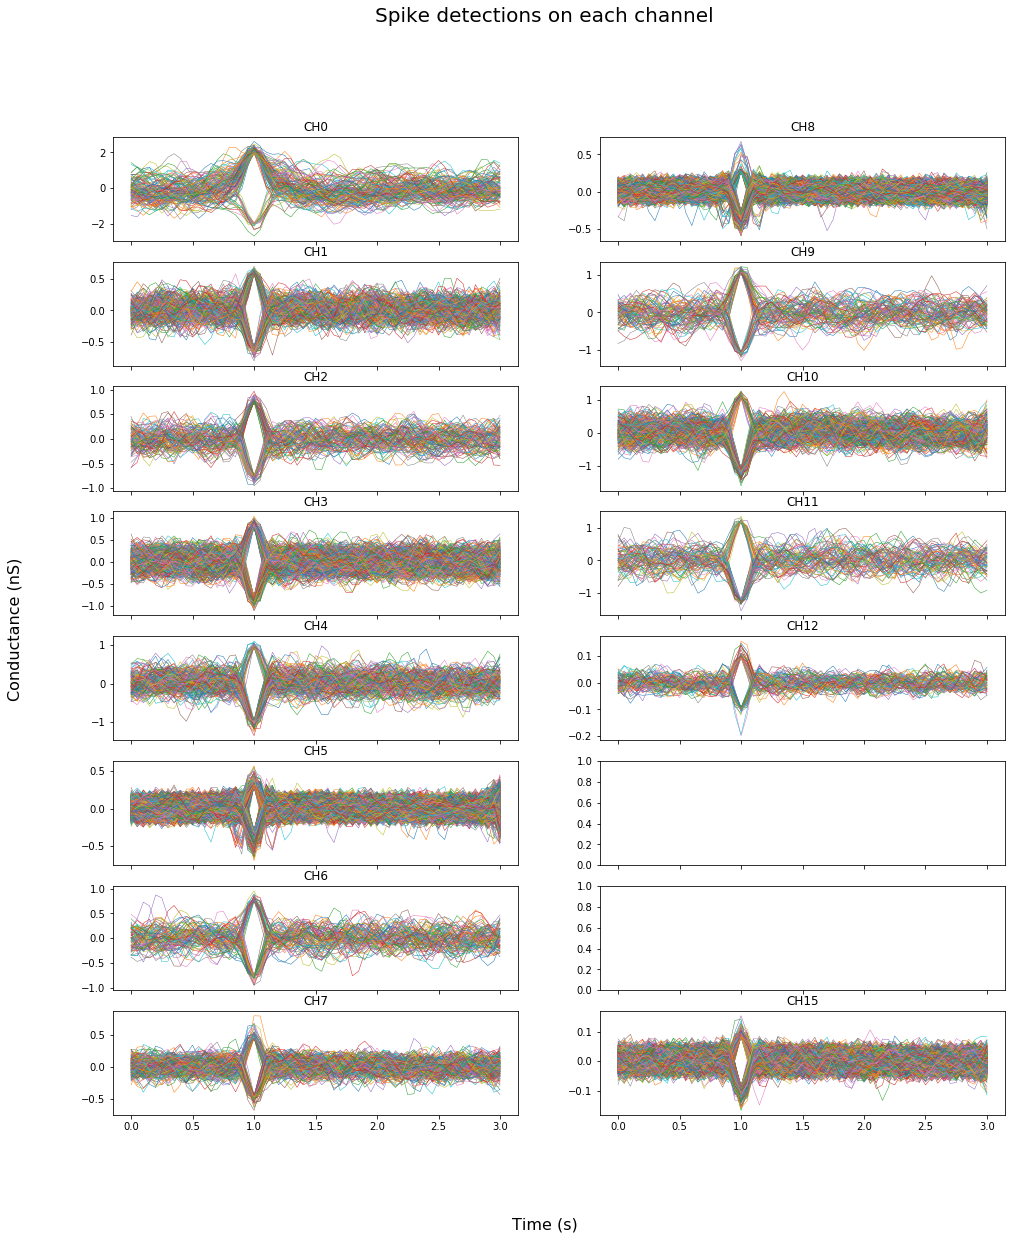

In [12]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle('Spike detections on each channel', fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    for j in range(len(spike1)):
        if spike1[j][1] == i:
            ax[i, 0].plot(time, spike1[j][2]*10, lw=0.5);
            ax[i, 0].set_title('CH' + str(i))
        else:
            pass
    for k in range(len(spike2)):
        if spike2[k][1] == i:
            ax[i, 1].plot(time, spike2[k][2]*10, lw=0.5);
            ax[i, 1].set_title('CH' + str(8+i));
        else:
            pass
